In [1]:
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
# The length of time to import the data into a df takes around 40s in .py files and "Execute Selection" was not working properly.
# The VS Code is to import the file to a df only once, while debugging and further analysis took place in .py and pycharm.
Diffusion_Data = pd.read_excel("1.000_to_1.200_Diff_Conts_30001_DataPts_1000_Time.xlsx")

In [3]:
Diffusion_Data

,D,Time,R_T_Diff_Con,Std_Dev,Var,Ini_Pos,Final_Pos,Pos_Difference
0,112,1000,1.0,473.286383,224000,15500,15830.801033,-330.801033
1,112,1000,1.0,473.286383,224000,15500,15200.373347,299.626653
2,112,1000,1.0,473.286383,224000,15500,14985.846244,514.153756
3,112,1000,1.0,473.286383,224000,15500,15588.844939,-88.844939
4,112,1000,1.0,473.286383,224000,15500,15114.425954,385.574046
...,...,...,...,...,...,...,...,...
629995,112,1000,1.2,473.286383,224000,15500,14823.323190,676.676810
629996,112,1000,1.2,473.286383,224000,15500,15128.136311,371.863689
629997,112,1000,1.2,473.286383,224000,15500,14806.937938,693.062062
629998,112,1000,1.2,473.286383,224000,15500,16343.913228,-843.913228


In [4]:
# Get the column titles for use in pandas functions
pos_diff = Diffusion_Data.columns[-1]
diff_const = Diffusion_Data.columns.values[2]
# Diffusion_Data2 will have outliers filtered out, while Diffusion_Data is unfiltered.
Diffusion_Data2 = Diffusion_Data

In [5]:
describe_diff_by_const = Diffusion_Data.groupby(diff_const)[pos_diff].describe()

In [6]:
# Before removing outliers get a count of the number of datapoints
count = describe_diff_by_const.iloc[0, 0]
# Remove outliers which are > 3*std
describe_diff_by_const['3*std'] = describe_diff_by_const['std']*3
describe_diff_by_const.sort_values(by='std', ascending=True)

,count,mean,std,min,25%,50%,75%,max,3*std
R_T_Diff_Con,,,,,,,,,
1.00,30000.0,-2.017339,455.735917,-1837.482887,-307.955386,-3.762467,304.785460,1774.805126,1367.207751
1.01,30000.0,-1.047931,459.196032,-1977.908452,-309.220800,3.288514,307.475648,2040.588674,1377.588097
1.02,30000.0,2.238489,461.386629,-2063.931590,-306.791813,5.889725,311.991341,2224.350269,1384.159886
1.03,30000.0,1.937430,463.291378,-2015.099406,-314.963517,2.062668,315.467150,1932.678587,1389.874134
1.04,30000.0,-1.708151,465.129498,-2158.876465,-314.733844,-0.832869,309.732618,2078.094411,1395.388495
1.05,30000.0,-2.505575,467.737312,-1926.601367,-316.438309,-6.177694,314.103679,1877.600987,1403.211937
1.06,30000.0,0.408245,473.766322,-1999.923631,-318.553696,-0.905216,315.680477,1883.272786,1421.298965
1.07,30000.0,3.085823,474.127636,-1766.524702,-317.341798,1.277675,323.067878,1930.972628,1422.382907
1.09,30000.0,1.478966,477.034501,-1767.388175,-321.091862,4.456678,323.053679,1806.024867,1431.103504


In [7]:
# Filter out datapoints that are greater than 3xSD
Diffusion_Data2 = Diffusion_Data2[np.abs(stats.zscore(Diffusion_Data2[pos_diff]) <= 3)]

In [8]:
# 95% of sample means will be expected to lie within a confidence interval of ±1.96 standard errors of the sample mean
describe_diff_by_const['std_error'] = describe_diff_by_const['std']/np.sqrt(describe_diff_by_const['count'])
describe_diff_by_const['95%_conf_int'] = describe_diff_by_const['std_error'] * 1.96
# Filter out the means that are not within the 95% confidence interval of the standard error.
describe_diff_by_const = describe_diff_by_const[np.abs(describe_diff_by_const['mean']) < describe_diff_by_const['95%_conf_int']]
describe_diff_by_const_list = describe_diff_by_const.reset_index().iloc[:, 0]

In [9]:
# Now filter out those constants that are not in the dataframe.
Diffusion_Data2 = Diffusion_Data2[Diffusion_Data2[diff_const].isin(describe_diff_by_const_list)]

In [37]:
# All outliers greater than 3*std, and means that are not within the 95% confidence interval of the standard error have been filtered out.
describe_diff_by_const = Diffusion_Data2.groupby(diff_const)[pos_diff].describe()
describe_diff_by_const['3*std'] = describe_diff_by_const['std']*3 # New value after outliers removed.
describe_diff_by_const['theor_std_error'] = Diffusion_Data['Std_Dev'][0]/np.sqrt(count) # now use "count" calculated before datapoints were filtered.
describe_diff_by_const['std_error'] = describe_diff_by_const['std']/np.sqrt(describe_diff_by_const['count'])
describe_diff_by_const['95%_conf_int'] = describe_diff_by_const['std_error'] * 1.96
describe_diff_by_const['opt_val'] = np.abs(describe_diff_by_const['mean']) + 5*(1 - describe_diff_by_const['std']/Diffusion_Data['Std_Dev'][0])
describe_diff_by_const['mean_plus_SE'] = np.abs(describe_diff_by_const['mean']) + describe_diff_by_const['std_error']


# describe_diff_by_const['b']
describe_diff_by_const['t-test'] = [(stats.ttest_1samp(Diffusion_Data2[Diffusion_Data2[diff_const] == x][pos_diff], popmean=0)) for x in describe_diff_by_const.index.values]
describe_diff_by_const['shapiro'] = [stats.shapiro(Diffusion_Data2[Diffusion_Data2[diff_const] == x][pos_diff]) for x in describe_diff_by_const.index.values]
describe_diff_by_const
# tstat, p = stats.ttest_1samp(Diffusion_Data2[Diffusion_Data2['alpha'] == ][''], popmean=0)

c:\Users\Mike\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,count,mean,std,min,25%,50%,75%,max,3*std,theor_std_error,std_error,95%_conf_int,opt_val,mean_plus_SE,t-test,shapiro
R_T_Diff_Con,,,,,,,,,,,,,,,,
1.00,29974.0,-3.383810,453.554751,-1837.482887,-308.360516,-4.201055,303.546573,1439.351921,1360.664252,2.73252,2.619735,5.134681,3.592263,6.003545,"(-1.291661039424167, 0.19648451541411413)","(0.9998201131820679, 0.013640538789331913)"
1.01,29975.0,-2.369910,457.084771,-1977.908452,-309.364348,2.845354,306.648854,1442.806197,1371.254314,2.73252,2.640080,5.174558,2.541071,5.009991,"(-0.8976660252985956, 0.3693708375631206)","(0.9995612502098083, 1.6046863038354786e-06)"
1.02,29975.0,0.914815,459.266464,-2063.931590,-306.976769,5.433326,310.808021,1439.869389,1377.799393,2.73252,2.652682,5.199256,1.062927,3.567496,"(0.34486414814714567, 0.730198924304178)","(0.9996582865715027, 3.58817633241415e-05)"
1.03,29961.0,-0.106673,460.092011,-2015.099406,-315.085396,1.146914,313.827535,1433.461650,1380.276032,2.73252,2.658071,5.209819,0.246064,2.764743,"(-0.04013160538015313, 0.9679884720476046)","(0.9997198581695557, 0.00030908818007446826)"
1.04,29966.0,-3.479375,462.387668,-2158.876465,-315.118501,-1.443108,308.913086,1431.009648,1387.163004,2.73252,2.671111,5.235377,3.594514,6.150486,"(-1.302595095824859, 0.19272304372303142)","(0.9996508359909058, 2.8014490453642793e-05)"
1.05,29975.0,-3.832926,465.657279,-1926.601367,-316.734558,-6.514079,313.211937,1441.084200,1396.971838,2.73252,2.689594,5.271605,3.913523,6.522520,"(-1.4250942324467746, 0.15414037585480211)","(0.9997313618659973, 0.00046736400690861046)"
1.06,29965.0,-1.424763,470.976806,-1999.923631,-318.756824,-1.583461,314.334063,1442.811755,1412.930417,2.73252,2.720773,5.332716,1.449163,4.145537,"(-0.5236611769000574, 0.6005180956459777)","(0.9996663928031921, 4.741159864352085e-05)"
1.07,29956.0,0.784241,470.623473,-1766.524702,-317.815268,0.301844,321.319791,1433.354933,1411.870418,2.73252,2.719141,5.329516,0.812373,3.503381,"(0.2884148529639394, 0.7730311951062019)","(0.9996796250343323, 7.478677434846759e-05)"
1.08,29967.0,-5.445653,474.752442,-1808.917377,-326.369524,-1.527478,316.372788,1441.713018,1424.257325,2.73252,2.742493,5.375287,5.430165,8.188147,"(-1.9856578967765768, 0.047080421367711824)","(0.9995841979980469, 3.2599566566204885e-06)"


In [ ]:
# DB = 0.25*((mean_p - mean_q)**2)/(std_p**2 + std_q**2) + 0.5*np.log((std_p**2 + std_q**2)/(2*std_p*std_q))

In [69]:
import seaborn as sb
hist_data = Diffusion_Data2[pos_diff].loc[Diffusion_Data2[diff_const] == 1.09]
# diff_const_hist = np.histogram(hist_data, bins=100)
stats.shapiro(hist_data)


c:\Users\Mike\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9996150135993958, pvalue=8.639823136036284e-06)

In [18]:
# Collect only diffusion data for one specific constant
hist_data = Diffusion_Data2[pos_diff].loc[Diffusion_Data2[diff_const] == 1.09]

In [19]:
# Make a histogram distribution out of the data collectied for the Kolmogorov–Smirnov test.
diff_const_hist = np.histogram(hist_data, bins=100, density=True)
# Find the line spacing between the bins.
dx = diff_const_hist[1][1] - diff_const_hist[1][0]
# The cumulative stepwise constant function of histogram to compare to theoretical.
diff_const_hist_CDF = [np.cumsum(diff_const_hist[0]*dx)]
# d is linespace, make a CDF for theoretical KS test.  Diffusion_Data['Std_Dev'][0] is a value for the theoretical standard deviation.
# The mean of the distribution is set to 0.
d = np.linspace(- 2500, 2500, 5000, dtype=int)
KS_theor_hist = stats.norm.cdf(d, 0, Diffusion_Data['Std_Dev'][0])
# Compare the theoretical "KS_Theor_Res" to the collected dp stepwise distribution "KS_MC_Res_CDF"
KS_Test_Result = stats.kstest(diff_const_hist_CDF[0], KS_theor_hist)

# If the p-value is smaller than your chosen significance level (e.g., 0.05) then the distributions are 'statistically
# different'. At the same time however, larger samples will more easily detect even the smallest differences between
# two distributions. So you could interpret smaller KS test statistics as 'less different',
# and larger ones as 'more different', roughly speaking

# The Kolmogorov–Smirnov test can be modified to serve as a goodness of fit test. In the special case of testing for
# normality of the distribution, samples are standardized and compared with a standard normal distribution.
# This is equivalent to setting the mean and variance of the reference distribution equal to the sample estimates.

# The KS-D level would be c(alpha)*sqrt((N1 + N2)/N1*N2) with N1 and N2 being the sample sizes and:
# α	    0.10	0.05	0.025	0.01	0.005	0.001  With lowering significance level,
# c(α)	1.22	1.36	1.48	1.63	1.73	1.95   The null hypothesis gets harder to reject
# The null hypothesis, (that the distribution of datapoints for a constant is the same as the theoretical distribution),
# is rejected at level α if KS-D > c(α)*sqrt((N1 + N2)/N1*N2).
# Theoretical distribution has 5000 datapoints in linspace, while histogram has 100 bins.
# Statistic at c(0.05) is 1.36*sqrt((5000 + 100)/500,000) = 0.137

print(f"The KS Statistic result is {KS_Test_Result[0]}")
print(f"The KS p-value result is {KS_Test_Result[1]}")

The KS Statistic result is 0.1844
The KS p-value result is 0.002180641112256567


In [22]:
d = np.linspace(- 2500, 2500, 5000, dtype=int)
KS_theor_hist = stats.norm.cdf(d, 0, Diffusion_Data['Std_Dev'][0])
KS_theor_hist

array([6.38159612e-08, 6.45562748e-08, 6.53048937e-08, ...,
       9.99999934e-01, 9.99999935e-01, 9.99999936e-01])

In [57]:
KS_df = pd.DataFrame(columns=[['alpha', 'D']])
KS_df['alpha'] = [0.100, 0.050, 0.025, 0.010, 0.005, 0.001]
ksd_dp_multiplier = np.sqrt((len(d) + len(diff_const_hist[0]))/ (len(d)*len(diff_const_hist[0])) ) # The RHS of the KS-D level equation to multiply by c(α)
KS_df['D'] = [1.22*ksd_dp_multiplier, 1.36*ksd_dp_multiplier, 1.48*ksd_dp_multiplier, 1.63*ksd_dp_multiplier, 1.73*ksd_dp_multiplier, 1.95*ksd_dp_multiplier]
KS_df

,alpha,D
0,0.100,0.123214
1,0.050,0.137353
2,0.025,0.149473
3,0.010,0.164622
4,0.005,0.174721
5,0.001,0.196940


In [24]:
for i in KS_df.index:
    if KS_Test_Result[0] < KS_df.loc[i,'D'][0] and KS_Test_Result[1] > KS_df.loc[i,'alpha'][0]:
        print("The null hypothesis is not passed and histogram resembles a normal distribution")
        print(f"const-D: {KS_Test_Result[0]} < KS-D: {KS_df.loc[i,'D'][0]} and \np: {KS_Test_Result[1]} > α: {KS_df.loc[i,'alpha'][0]}")
    else:
        print("The null hypothesis is passed and the histogram does not resemble a normal distribution")

The null hypothesis is passed and the histogram does not resemble a normal distribution
The null hypothesis is passed and the histogram does not resemble a normal distribution
The null hypothesis is passed and the histogram does not resemble a normal distribution
The null hypothesis is passed and the histogram does not resemble a normal distribution
The null hypothesis is passed and the histogram does not resemble a normal distribution
The null hypothesis is not passed and histogram resembles a normal distribution
const-D: 0.1844 < KS-D: 0.1969403462980605 and 
p: 0.002180641112256567 > α: 0.001


In [65]:
# Combine everything described above into a for loop to cycle between all constants.
# Generate a list of which constants pass the Kolmogorov–Smirnov test.
KS_const_results_df = []
for x in describe_diff_by_const.index:
    # For diffusion constant x, make a histogram of the data collected.
    hist_data = Diffusion_Data2[pos_diff].loc[Diffusion_Data2[diff_const] == x]
    # Make a histogram distribution out of the data collectied for the Kolmogorov–Smirnov test.
    diff_const_hist = np.histogram(hist_data, bins=100, density=True)
    # Find the line spacing between the bins.
    dx = diff_const_hist[1][1] - diff_const_hist[1][0]
    # The cumulative stepwise constant function of histogram to compare to theoretical.
    diff_const_hist_CDF = [np.cumsum(diff_const_hist[0]*dx)]
    # d is linespace, make a CDF for theoretical KS test.  Diffusion_Data['Std_Dev'][0] is a value for the theoretical standard deviation.
    # The mean of the distribution is set to 0.
    d = np.linspace(- 2500, 2500, 5000, dtype=int)
    KS_theor_hist = stats.norm.cdf(d, 0, Diffusion_Data['Std_Dev'][0])
    # Compare the theoretical "KS_Theor_Res" to the collected dp stepwise distribution "KS_MC_Res_CDF"
    KS_Test_Result = stats.kstest(diff_const_hist_CDF[0], KS_theor_hist)
    for i in KS_df.index:
        if KS_Test_Result[0] < KS_df.loc[i,'D'][0] and KS_Test_Result[1] > KS_df.loc[i,'alpha'][0]:
            ks_dict = {'const': x, 'test-D': KS_Test_Result[0], 'KS-D': KS_df.loc[i,'D'][0], 'p': KS_Test_Result[1], 'alpha': KS_df.loc[i,'alpha'][0]}
            KS_const_results_df.append(ks_dict)
            break
KS_const_results_df = pd.DataFrame(KS_const_results_df)
KS_const_results_df.sort_values(by=['test-D'], ascending=False)

,const,test-D,KS-D,p,alpha
14,1.16,0.1918,0.19694,0.001248,0.001
3,1.03,0.1908,0.19694,0.001347,0.001
12,1.13,0.1908,0.19694,0.001347,0.001
13,1.15,0.1894,0.19694,0.001499,0.001
11,1.11,0.1892,0.19694,0.001522,0.001
7,1.07,0.1890,0.19694,0.001545,0.001
6,1.06,0.1876,0.19694,0.001718,0.001
10,1.10,0.1850,0.19694,0.002086,0.001
9,1.09,0.1844,0.19694,0.002181,0.001
4,1.04,0.1832,0.19694,0.002382,0.001


In [22]:
# Use Lagrange Multipliers
# maximize(test-D/KS-D), maximize(p/alpha)
# subject to p >= alpha, and test-D <= KS-D

# minimize(z = -x/KS-D - y/alpha)
# subject to constraints: x <= KS-D, -y <= -alpha
# x >= 0, y >= 0


0.9999998723584483


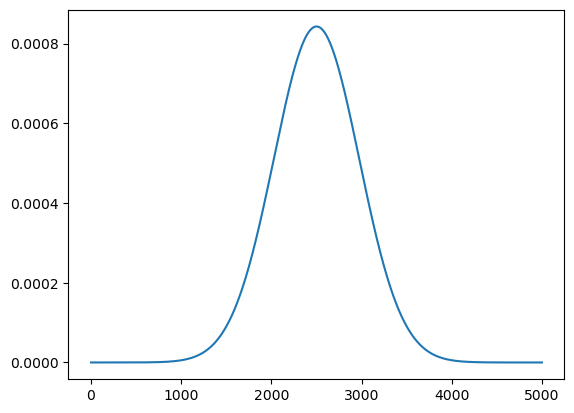

In [28]:
import matplotlib.pyplot as plt
d = np.linspace(- 2500, 2500, 5000, dtype=int)
KS_theor_hist = stats.norm.pdf(d, 0, Diffusion_Data['Std_Dev'][0])
print(sum(KS_theor_hist))
# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(KS_theor_hist)
plt.show()

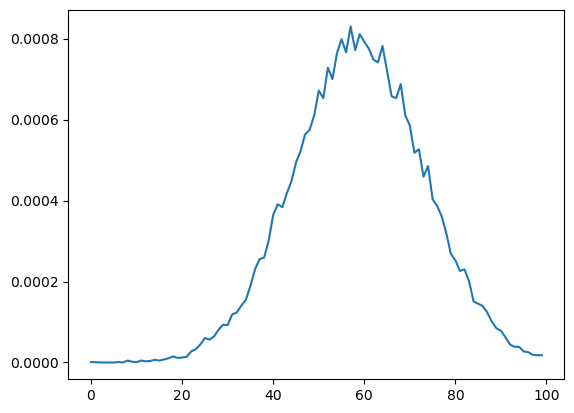

In [34]:
import matplotlib.pyplot as plt
# Make a histogram distribution out of the data collectied for the Kolmogorov–Smirnov test.
diff_const_hist = np.histogram(hist_data, bins=100, density=True)
# Find the line spacing between the bins.
dx = diff_const_hist[1][1] - diff_const_hist[1][0]
# The cumulative stepwise constant function of histogram to compare to theoretical.
diff_const_hist_CDF = [np.cumsum(diff_const_hist[0]*dx)]
# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(diff_const_hist[0])
plt.show()